In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

# Warmup: Least Squares with 2d synthetic data

We will start with a simple least squares example on synthetic data with the goal of visualization.

(a) Create a vector of inputs x with 101 regularly-spaced entries between 0 and 1. 

Create a vector of labels y = 1 + x + x*z, where z is drawn from the uniform distribution on the half open interval [0, 1).

In [168]:
#Todo: Part a
x = np.linspace(0,1,101)
print("x:",x)

#size = (len(x),1)
z = np.random.uniform(0, 1, 101)
#print(z)

y = 1 + x + x*z
print("y:",y)

x: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
y: [1.         1.01319842 1.02152938 1.04824198 1.04227033 1.06510716
 1.08451233 1.07603568 1.09512246 1.15942094 1.15682669 1.13855437
 1.12662691 1.15051254 1.17908454 1.25778915 1.23230087 1.19045145
 1.30239869 1.2302262  1.32882835 1.29367147 1.40485076 1.3832896
 1.33544642 1.30244897 1.47686172 1.4010588  1.40874116 1.44759458
 1.51614554 1.55668799 1.61151347 1.38362892 1.5958996  1.4055595
 1.58537501 1.48316732 1.54706038 1.65216924 1.62450274 1.61586404
 1.44296706 1

(b) Create a matrix A whose first column is the vector x above, and it's second column is the ones vector.

In [169]:
# TODO Part (b): Assemble matrix A
ones = np.ones(len(x))
A = np.stack((x,ones),axis=1)
# print(A)

# turn y into a column vector
y = y[:, np.newaxis]
# print(y.shape)

(c) Solve the ordinary least squares problem to obtain a vector w of coefficients.

In [170]:
# TODO: Part (c)
w = np.dot(np.linalg.pinv(A),y)
print(w)

[[1.50359678]
 [0.99798119]]


(d) Plot the training data (x,y) as blue dots and the learned function as a red line

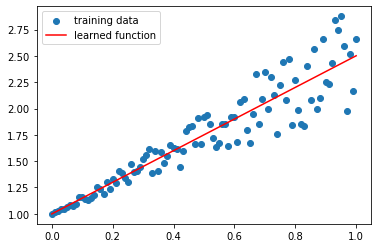

In [171]:
# TODO: Part (d)
#print(x)
#print(y)
plt.scatter(x,y, label="training data")
plt.plot(x,np.dot(A,w), color='red', label="learned function")
plt.legend()
plt.show()

# System Identification

Making autonomous vehicles involves machine learning for different purposes. One of which is learning how cars actually behave based on their data.

**Setup for parts (a) and (b):** Assume that $x_t$ is the position of a car and obeys the following linear dynamics $$x_{t+1} = A^* x_t + B^* u_t $$

We do not know the matrices $A^*$ and $B^*$. But we have data about the cars position for timesteps $1 \ldots T$. We want to use this data to infer the underlying dynamics.

## Scalar Least Squares

First, we consider the simpler case where $x_t \in \mathbb{R}$ and $A^*, B^*$ are scalars as well.

(a) Consider the time sequence of scalars $x_t \in \mathbb{R}$ and $u_t \in \mathbb{R}$ in which $x_{t + 1} ≈ A x_t + B u_t$. In control theory, $x_t$ usually represents the state, and $u_t$ usually represents the control input. Find and output the numbers $A$ and $B$ so that $\sum_t (x_{t +1} − Axt − But)^2$ is minimized. The values of x_t and u_t are stored in a.mat.

In [172]:
mdict = io.loadmat("a.mat")

x = mdict['x']
u = mdict['u']

# TODO: Your code to compute a and b
#print(x.shape)
v = np.stack((x[0][:-1],u[0][:-1]), axis=-1)

w = np.dot(np.linalg.pinv(v),x[0][1:])
# print(w)

print("A:", w[0])
print("B:", w[1])
    

A: 0.9775521351844118
B: -0.08775321877345668


## Matrix least squares

(b) Consider the time sequences of vectors $x_t \in \mathbb{R}^3$ and $u_t \in \mathbb{R}^3$ in which $x_{t + 1} ≈ Axt + But$ . Find and output the matrix $A \in \mathbb{R}^{3×3}$ and $B \in \mathbb{R}^{3×3}$ so that the sum of the squared $l_2$-norms of the error, 
$$\sum_t \| x_{t+1} − A x_t −B u_t \|_2^2 $$
is minimized. The values of x_t and u_t are stored in b.mat.

In [173]:
mdict = io.loadmat("b.mat")

x = mdict['x']
u = mdict['u']

x = x.reshape(x.shape[:-1])
u = u.reshape(u.shape[:-1])

# TODO: Your code to compute A, 
v = np.hstack((x[:-1], u[:-1]))
w = np.dot(np.linalg.pinv(v),x[1:])
print(w)

# checking
# c = np.dot(v,w)
# print("c: ")
# print(c[0:4])
# print("x: ")
# print(x[1:5])


[[ 0.15207406  0.03893567 -0.52552959]
 [ 0.93480864  0.30958727  0.0540906 ]
 [-0.00110243  0.87436511 -0.47026217]
 [ 0.04894161 -0.04524735  0.91096923]
 [ 0.20568264 -0.92861546 -0.47124981]
 [-0.37090438  0.12756569 -0.84222314]]


## Acceleration model

(c) Consider a car following model that models how cars line up on a straight 1D highway at a given time. The acceleration of a car can be approximated by a linear function of the positions and velocities of its own and the car in front of it. Mathematically, we can formulate this as

$$
\ddot{x}_{i} \approx a x_{i}+b \dot{x}_{i}+c x_{i-1}+d \dot{x}_{i-1}+e
$$

where $x_{i}, \dot{x}_{i}$, and $\ddot{x}_{i}$ are the position, velocity, and acceleration of the $i$ th car in the line.
Find $a, b, c, d$, and $e$ that minimize

$$
\sum_{i}\left\|-\ddot{x}_{i}+a x_{i}+b \dot{x}_{i}+c x_{i-1}+d \dot{x}_{i-1}+e\right\|_{2}^{2}
$$

using data file train. mat, which contains the status of 40000 cars at a given point from the I- 80 highway in California. The data were sampled from the Next Generation Simulation (NGSIM) dataset so that the $i$ may not be continuous. For your convenience, we give you the profiles of each sampled car and the car that is in front of it.

In [174]:
# TODO: Solve part (c)
mdict = io.loadmat("train.mat")

# Assemble xu matrix
x = mdict["x"]   # position of a car
v = mdict["xd"]  # velocity of the car
xprev = mdict["xp"]   # position of the car ahead
vprev = mdict["xdp"]  # velocity of the car ahead

acc = mdict["xdd"]  # acceleration of the car

a, b, c, d, e = 0, 0, 0, 0, 0

# Your code to compute a, b, c, d, e
e = np.ones(len(x[0]))
e = e[np.newaxis, :]

u = np.concatenate((x,v,xprev,vprev,e))
u = np.transpose(u)
acc = np.transpose(acc)
w = np.dot(np.linalg.pinv(u),acc)

a = w[0]
b = w[1]
c = w[2]
d = w[3]
e = w[4]

print("a: ",a)
print("b: ",b)
print("c: ",c)
print("d: ",d)
print("e: ",e)

# checking prediction with data
c = np.dot(u,w)
c = np.transpose(c)
print("predicted:",c[0][0:4])

print("data:",mdict["xdd"][0][0:4])

a:  [-0.01152121]
b:  [-0.31779341]
c:  [0.01128933]
d:  [0.27535824]
e:  [-0.88293502]
predicted: [ 0.21071292  0.9001815  -0.30710525 -1.2498371 ]
data: [-0.21320313  0.03931307 -0.5287676  -3.81097518]
